11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 55s 70ms/step - loss: 0.2259 - accuracy: 0.9310 - val_loss: 0.0794 - val_accuracy: 0.9752
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0587 - accuracy: 0.9817 - val_loss: 0.0833 - val_accuracy: 0.9764
Epoch 3/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0480 - val_accuracy: 0.9869
Epoch 4/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0388 - val_accuracy: 0.9890
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0406 - accuracy: 0.9870
Test accuracy: 0.9869999885559082
313/313 [==============================] - 4s 12ms/step


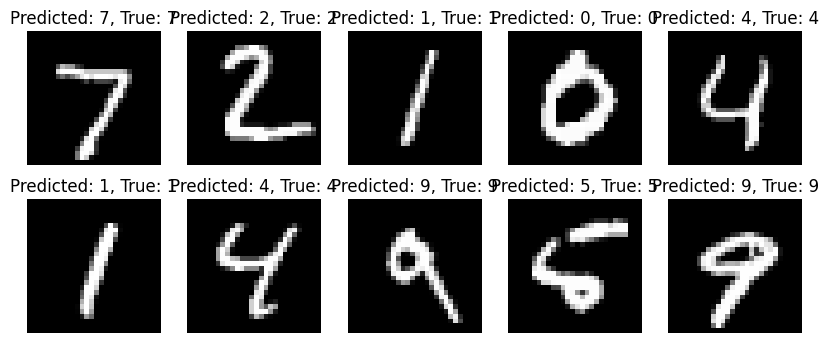

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Build the convolutional neural network model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Make predictions
predictions = model.predict(test_images)

# Display some predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {tf.argmax(predictions[i])}, True: {tf.argmax(test_labels[i])}')
    plt.axis('off')

plt.show()
